# Fraud Detection - EDA & Model Building

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# loading dataset

In [43]:
df=pd.read_csv("AIML Dataset.csv")

## 2. Data Exploration

In [44]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [46]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [47]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [48]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [49]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [50]:
df.shape

(6362620, 11)

In [51]:
#fraud percentage
fraud_percentage=(df["isFraud"].value_counts()[1]/df.shape[0])*100
print(fraud_percentage)

0.12908204481801522


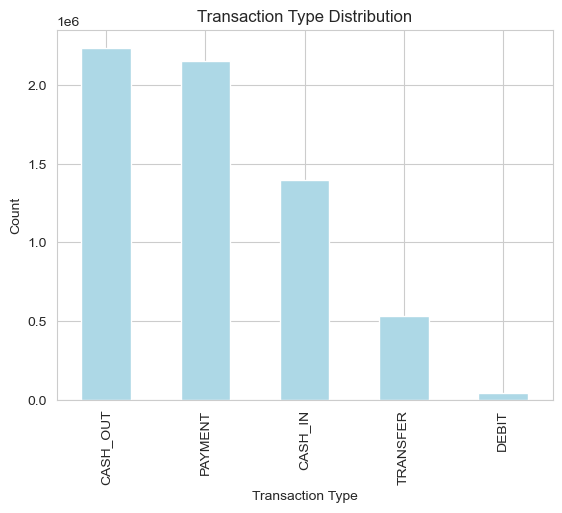

In [52]:
df["type"].value_counts().plot(kind="bar",title="Transaction Type Distribution",color="lightblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show() 

Text(0, 0.5, 'Fraud Rate')

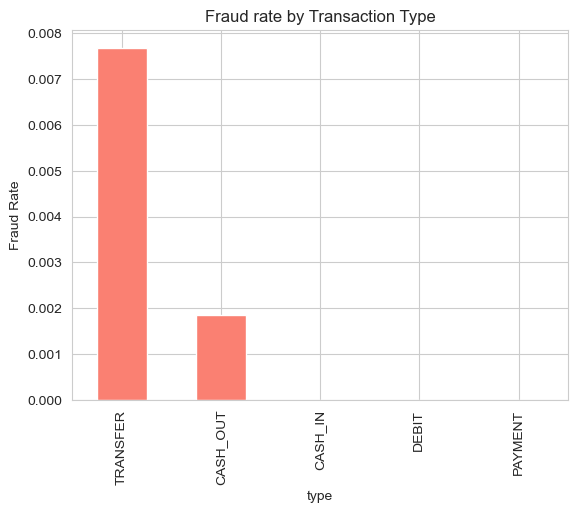

In [53]:
fraud_by_types=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_types.plot(kind="bar",title="Fraud rate by Transaction Type",color="salmon")
plt.ylabel("Fraud Rate")

In [54]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

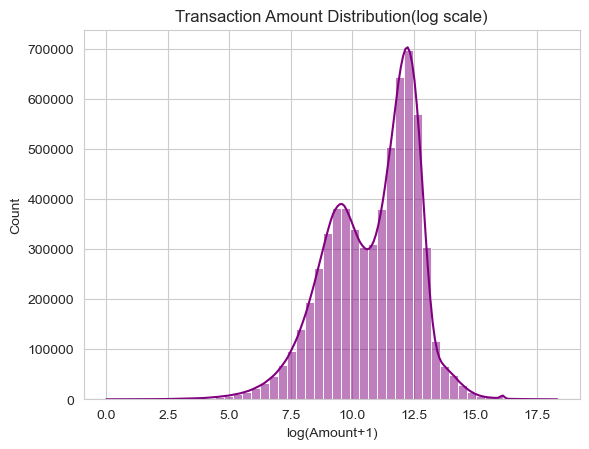

In [55]:
sns.histplot(np.log1p(df["amount"]),bins=50,kde=True,color="purple")
plt.title("Transaction Amount Distribution(log scale)")
plt.xlabel("log(Amount+1)")
plt.show()

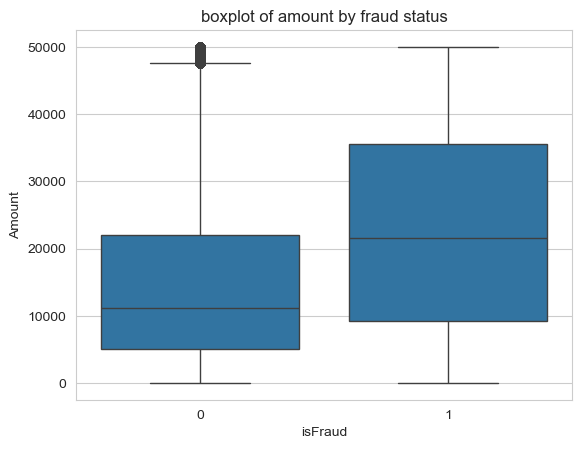

In [56]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("boxplot of amount by fraud status")
plt.xlabel("isFraud")
plt.ylabel("Amount")
plt.show()

## 3. Feature Engineering

In [57]:
df.drop(columns=["step"],inplace=True)

In [58]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [59]:
top_sender=df["nameOrig"].value_counts().head(10)

In [60]:
top_sender

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [61]:
top_receiver=df["nameDest"].value_counts().head(10)

In [62]:
top_receiver

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [63]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [64]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Text(0.5, 1.0, 'Fraud count by Transaction type CASH_OUT and TRANSFER')

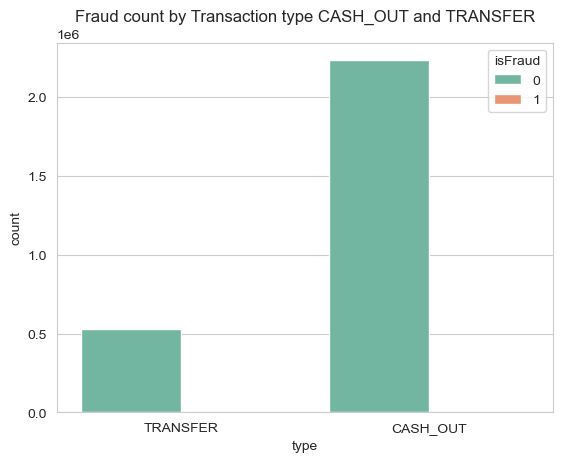

In [65]:
sns.countplot(data=fraud_types,x="type",hue="isFraud",palette="Set2")
plt.title("Fraud count by Transaction type CASH_OUT and TRANSFER")

In [66]:
corr=df[[ "amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [67]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


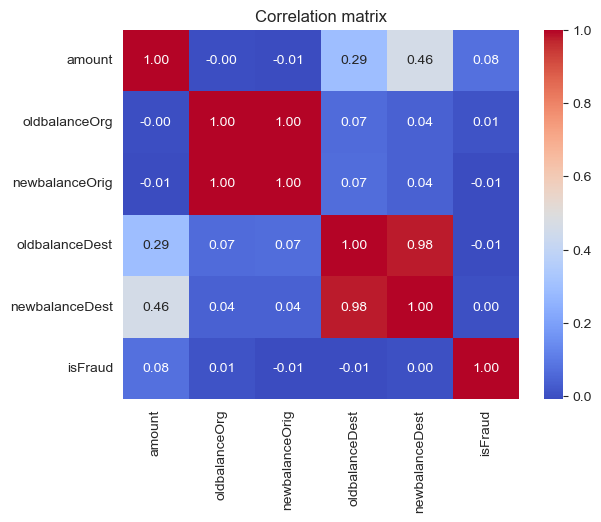

In [68]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [69]:
zero_after_transfer=df[(df["oldbalanceOrg"]>0)&
                       (df["newbalanceOrig"]==0)&
                       (df["type"].isin(["TRANSFER","CASH_OUT"]))
                       ]
print("Number of transactions with zero new balance after transfer or cash out:",zero_after_transfer.shape)

Number of transactions with zero new balance after transfer or cash out: (1188074, 10)


In [70]:
zero_after_transfer.head(10)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
60,CASH_OUT,82940.31,C1528834618,3017.87,0.0,C476800120,132372.0,49864.36,0,0
72,CASH_OUT,94253.33,C1718906711,25203.05,0.0,C977993101,99773.0,965870.05,0,0


In [71]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

## 4. Model Building

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


In [73]:
df_model=df.drop(columns=["nameOrig","nameDest","isFlaggedFraud"])

In [74]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [75]:
categorical=["type"]
numerical=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [76]:
Y=df_model["isFraud"]
X=df_model.drop(columns=["isFraud"])

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [78]:
preprocessor=ColumnTransformer(transformers=[
    ("num",StandardScaler(),numerical),
    ("cat",OneHotEncoder(drop="first"),categorical)
    ],remainder="drop")


In [89]:
pipeline=Pipeline([("prep",preprocessor),
                   ("clf",RandomForestClassifier(n_estimators=100,random_state=42,max_depth=10,n_jobs=-1))

])

In [90]:
pipeline.fit(X_train,Y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [91]:
y_pred=pipeline.predict(X_test)

In [92]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.72      0.83      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.86      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



In [86]:
confusion_matrix(Y_test,y_pred)

array([[1879870,   26452],
       [     30,    2434]])

In [ ]:
pipeline.score(X_test,Y_test)

0.9467462565211606

In [87]:
import joblib
joblib.dump(pipeline,"fraud_detection_model.pkl")

['fraud_detection_model.pkl']